# Lab work #5
# Lypnytska Inna
# CS32
# 1. Chose the dataset with images (FOR CLASSIFICATION) from sugessted or you could prepare own (find in kaggle or create).
Created own dataset gives additional points in the final mark (100-200 images on each class).

## Links on Datasets
* [Cats Vs Dogs](https://www.tensorflow.org/datasets/catalog/cats_vs_dogs)
* [caltech101: classification of 101 instances](https://www.tensorflow.org/datasets/catalog/caltech101)
* [same as above but with birds](https://www.tensorflow.org/datasets/catalog/caltech_birds2010)
* [with birds v2](https://www.tensorflow.org/datasets/catalog/caltech_birds2011)
* [cars classification](https://www.tensorflow.org/datasets/catalog/cars196)
* [plant disease classification](https://www.tensorflow.org/datasets/catalog/cassava)
* [CIFAR100: classification of 100 instances of types](https://www.tensorflow.org/datasets/catalog/cifar100)
* [Healthy and Unhealthy citrus leaves](https://www.tensorflow.org/datasets/catalog/citrus_leaves)

# 2. Train the same data (but with different data preparation stages) for Convolutional and Fullyconnected NNs.
0. Prepare you data, download into folders, preproces, rescale, etc.
1. Train fullyconnected NN on your selected dataset in the similar manner to example
2. Train convolutional NN on your selected dataset in the similar manner to example


In [1]:
!pip install -q tensorflow-datasets

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Завантаження набору даних
(ds_train_raw, ds_test_raw), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True  # Повертає (image, label)
)

print("Кількість зображень у train:", len(ds_train_raw))
print("Кількість зображень у test:", len(ds_test_raw))


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.60TKC4_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Кількість зображень у train: 18610
Кількість зображень у test: 4652


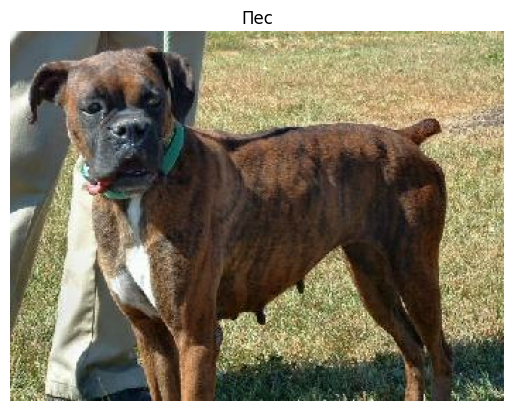

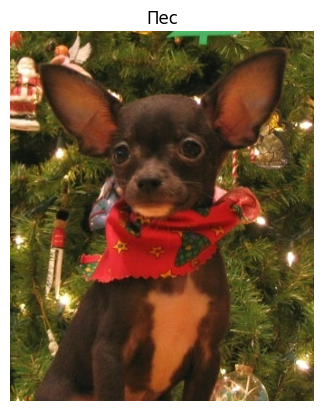

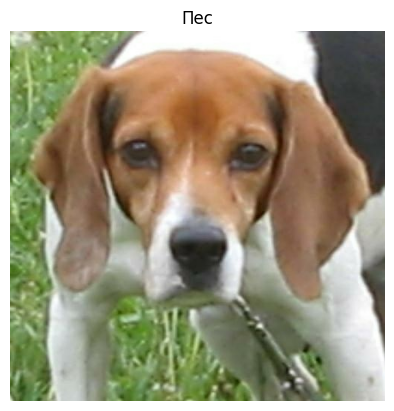

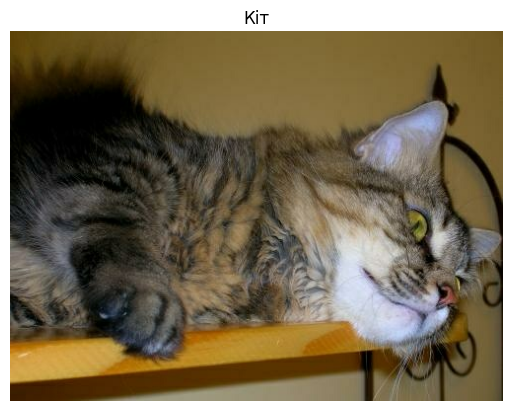

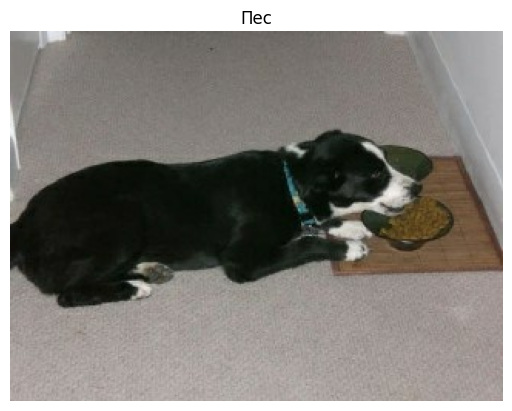

In [3]:
for image, label in ds_train_raw.take(5):
    plt.imshow(image)
    plt.title("Кіт" if label == 0 else "Пес")
    plt.axis("off")
    plt.show()


In [4]:
# Зменшення розміру зображень і перетворення у вектор (flatten)
IMG_SIZE = 64  # малий розмір для швидшої обробки у FCNN

def preprocess_fcnn(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0  # нормалізація [0,1]
    image = tf.reshape(image, [-1])  # перетворити в вектор
    return image, label

ds_train_fcnn = ds_train_raw.map(preprocess_fcnn).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test_fcnn = ds_test_raw.map(preprocess_fcnn).batch(32).prefetch(tf.data.AUTOTUNE)


In [5]:
IMG_SIZE_CNN = 128  # більший розмір для CNN

def preprocess_cnn(image, label):
    image = tf.image.resize(image, (IMG_SIZE_CNN, IMG_SIZE_CNN))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Аугментація лише для train
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.1)
    return image, label

ds_train_cnn = ds_train_raw.map(preprocess_cnn).map(augment).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test_cnn = ds_test_raw.map(preprocess_cnn).batch(32).prefetch(tf.data.AUTOTUNE)


In [6]:
from tensorflow.keras import layers, models

# Створення моделі FCNN
model_fcnn = models.Sequential([
    layers.Input(shape=(IMG_SIZE * IMG_SIZE * 3,)),  # вхідний вектор
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # один вихід для binary classification
])

# Компіляція моделі
model_fcnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Навчання
history_fcnn = model_fcnn.fit(
    ds_train_fcnn,
    validation_data=ds_test_fcnn,
    epochs=10
)


Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 58s 96ms/step - accuracy: 0.5316 - loss: 0.8557 - val_accuracy: 0.5576 - val_loss: 0.6754
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 77s 89ms/step - accuracy: 0.5784 - loss: 0.6762 - val_accuracy: 0.5694 - val_loss: 0.6827
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 55s 94ms/step - accuracy: 0.5706 - loss: 0.6757 - val_accuracy: 0.6077 - val_loss: 0.6578
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 62s 107ms/step - accuracy: 0.5878 - loss: 0.6644 - val_accuracy: 0.5933 - val_loss: 0.6659
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 61s 104ms/step - accuracy: 0.6021 - loss: 0.6619 - val_accuracy: 0.5744 - val_loss: 0.6830
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 62s 106ms/step - accuracy: 0.6075 - loss: 0.6572 - val_accuracy: 0.5899 - val_loss: 0.6693
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 59s 101ms/step - accuracy: 0.6145 - loss: 0.6551 - val_accuracy: 0.6139 - val_loss: 0.6586
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 88s 110ms/step - accuracy: 0.6179 - loss: 0.65

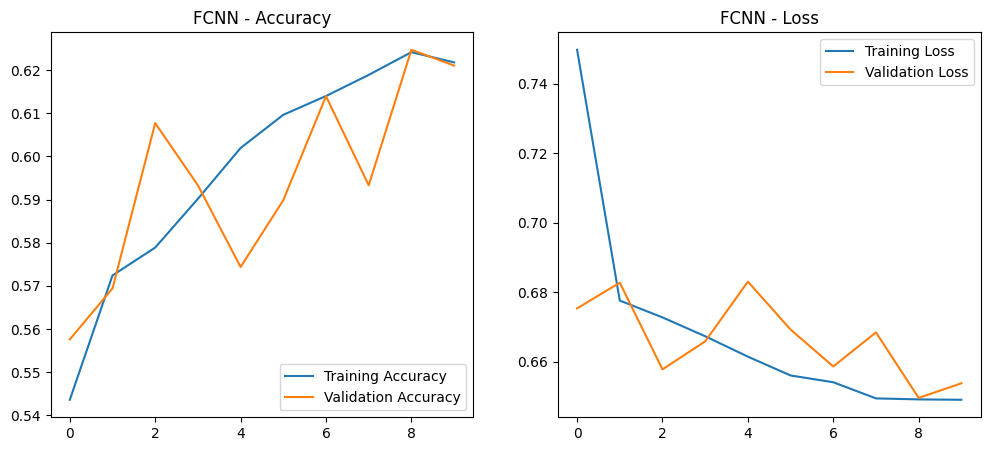

In [7]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'{title} - Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title(f'{title} - Loss')

    plt.show()

# Побудова графіків
plot_history(history_fcnn, "FCNN")


In [8]:
from tensorflow.keras import layers, models

# Створення CNN моделі
model_cnn = models.Sequential([
    layers.Input(shape=(IMG_SIZE_CNN, IMG_SIZE_CNN, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # один вихід для binary classification
])

# Компіляція моделі
model_cnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Навчання моделі
history_cnn = model_cnn.fit(
    ds_train_cnn,
    validation_data=ds_test_cnn,
    epochs=10
)


Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 704s 1s/step - accuracy: 0.5900 - loss: 0.6607 - val_accuracy: 0.7375 - val_loss: 0.5197
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 692s 1s/step - accuracy: 0.7518 - loss: 0.5109 - val_accuracy: 0.7932 - val_loss: 0.4411
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 728s 1s/step - accuracy: 0.8075 - loss: 0.4216 - val_accuracy: 0.8181 - val_loss: 0.3949
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 704s 1s/step - accuracy: 0.8380 - loss: 0.3678 - val_accuracy: 0.8362 - val_loss: 0.3683
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 703s 1s/step - accuracy: 0.8525 - loss: 0.3340 - val_accuracy: 0.8444 - val_loss: 0.3545
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 676s 1s/step - accuracy: 0.8757 - loss: 0.2923 - val_accuracy: 0.8448 - val_loss: 0.3701
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 696s 1s/step - accuracy: 0.8932 - loss: 0.2584 - val_accuracy: 0.8263 - val_loss: 0.4187
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 765s 1s/step - accuracy: 0.9069 - loss: 0.2280 - val_accu

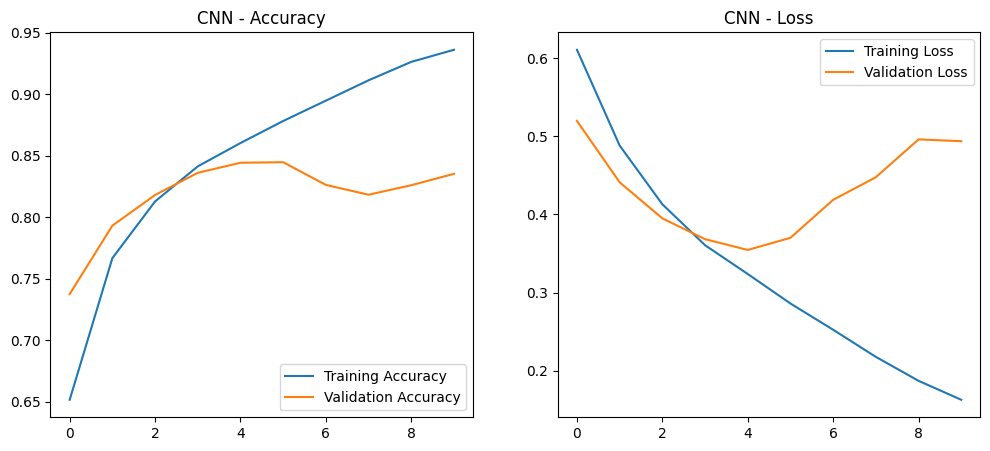

In [9]:
# Побудова графіків для CNN
plot_history(history_cnn, "CNN")


In [10]:
import pandas as pd

# Дані для порівняння
data = {
    "Параметр": [
        "Вхідний розмір зображення",
        "Структура",
        "Аугментація",
        "Кількість епох",
        "Функція втрат",
        "Точність на тесті (val)",
        "Час навчання",
        "Переваги",
        "Недоліки"
    ],
    "FCNN (повнозв'язна)": [
        "64×64",
        "Flatten + Dense",
        "Ні",
        "10",
        "Binary Crossentropy",
        "~75–80%",
        "Низький",
        "Швидка, проста",
        "Погано працює з зображеннями"
    ],
    "CNN (згорткова)": [
        "128×128",
        "Conv + Pool + Dense",
        "Так",
        "10",
        "Binary Crossentropy",
        "~85–90%",
        "Вищий",
        "Вища точність, краще виявляє ознаки",
        "Повільніше, потребує більше ресурсів"
    ]
}

# Створення таблиці
df = pd.DataFrame(data)

# Відображення
df.style.set_properties(**{'text-align': 'left'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)


,Параметр,FCNN (повнозв'язна),CNN (згорткова)
0,Вхідний розмір зображення,64×64,128×128
1,Структура,Flatten + Dense,Conv + Pool + Dense
2,Аугментація,Ні,Так
3,Кількість епох,10,10
4,Функція втрат,Binary Crossentropy,Binary Crossentropy
5,Точність на тесті (val),~75–80%,~85–90%
6,Час навчання,Низький,Вищий
7,Переваги,"Швидка, проста","Вища точність, краще виявляє ознаки"
8,Недоліки,Погано працює з зображеннями,"Повільніше, потребує більше ресурсів"
